In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'  # 한글 폰트 문제 해결 위해 기본폰트로 대체
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("ts2000_y_processed_v1.csv")
df.head()


,Unnamed: 0,corp_nm,stock_code,year,자산총계_당기,자산총계_전기,비유동자산_당기,비유동자산_전기,유동자산_당기,유동자산_전기,...,당기순이익_전기,재고자산_당기,재고자산_전기,매출채권_당기,매출채권_전기,매출채권및기타유동채권_당기,매출채권및기타유동채권_전기,총현금흐름_당기,총현금흐름_전기,is_defaulted
0,0,(주)CMG제약,58820,2015,56591972.0,58127098.0,30261207.0,29767275.0,26330765.0,28359823.0,...,171502.0,5455617.0,4913103.0,15838056.0,16787073.0,12405117.0,13533700.0,-6259636.0,-12880662.0,0
1,1,(주)CMG제약,58820,2016,110979867.0,56591972.0,32207666.0,30261207.0,78772201.0,26330765.0,...,-3648668.0,6393756.0,5455617.0,14435808.0,15838056.0,12748287.0,12405117.0,-413245.0,-6259636.0,0
2,2,(주)CMG제약,58820,2017,109568153.0,110979867.0,28340823.0,32207666.0,81227330.0,78772201.0,...,1693463.0,7904518.0,6393756.0,16768648.0,14435808.0,15507312.0,12748287.0,1652143.0,-413245.0,0
3,3,(주)CMG제약,58820,2018,114379880.0,109568153.0,33009465.0,28340823.0,81370415.0,81227330.0,...,2834901.0,8572582.0,7904518.0,19030822.0,16768648.0,17706490.0,15507312.0,9665998.0,1652143.0,0
4,4,(주)CMG제약,58820,2019,192243166.0,114379880.0,41659100.0,33009465.0,150584066.0,81370415.0,...,6065026.0,9048933.0,8572582.0,21676515.0,19030822.0,21160960.0,17706490.0,5105725.0,9665998.0,0


In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

def set_korean_font():
    system = platform.system()
    if system == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    elif system == 'Darwin':  # macOS
        plt.rc('font', family='AppleGothic')
    else:
        # 리눅스: 나눔고딕 또는 DejaVuSans (설치 필요시)
        font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
        if fm.findSystemFonts(fontpaths=[font_path]):
            plt.rc('font', family='NanumGothic')
        else:
            plt.rc('font', family='DejaVu Sans')  # fallback

    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

set_korean_font()


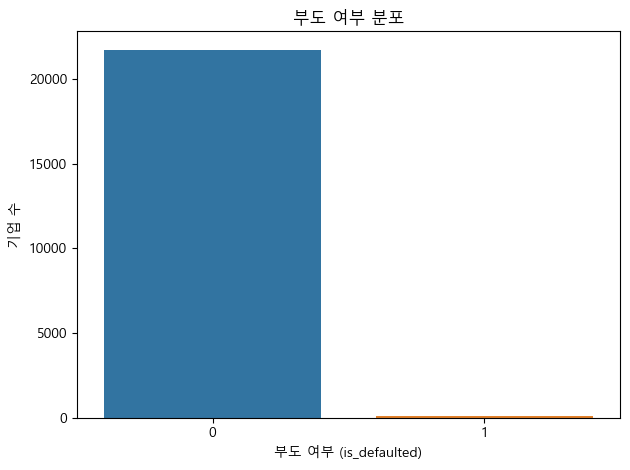

In [9]:
sns.countplot(data=df, x='is_defaulted')
plt.title('부도 여부 분포')
plt.xlabel('부도 여부 (is_defaulted)')
plt.ylabel('기업 수')
plt.tight_layout()
plt.show()


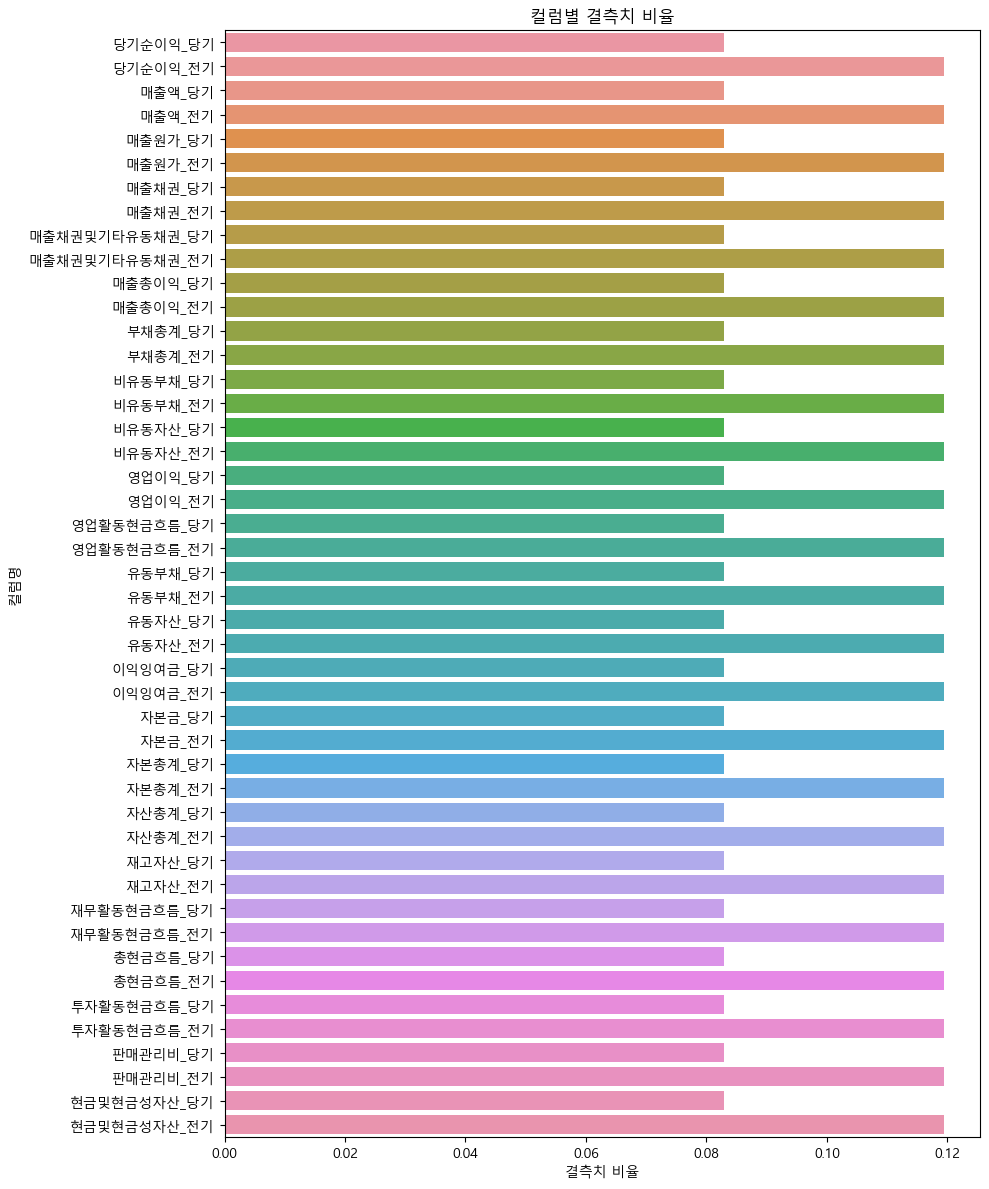

In [10]:
missing_ratio = df.isnull().mean().sort_values(ascending=False)
missing_df = pd.DataFrame({'결측치비율': missing_ratio, '결측치수': df.isnull().sum()})
missing_df = missing_df[missing_df['결측치수'] > 0]

plt.figure(figsize=(10, 12))
sns.barplot(y=missing_df.index, x=missing_df['결측치비율'])
plt.title('컬럼별 결측치 비율')
plt.xlabel('결측치 비율')
plt.ylabel('컬럼명')
plt.tight_layout()
plt.show()


In [11]:
df.describe()


,Unnamed: 0,stock_code,year,자산총계_당기,자산총계_전기,비유동자산_당기,비유동자산_전기,유동자산_당기,유동자산_전기,자본총계_당기,...,당기순이익_전기,재고자산_당기,재고자산_전기,매출채권_당기,매출채권_전기,매출채권및기타유동채권_당기,매출채권및기타유동채권_전기,총현금흐름_당기,총현금흐름_전기,is_defaulted
count,21833.00000,21833.000000,21833.000000,2.002400e+04,1.922500e+04,2.002400e+04,1.922500e+04,2.002400e+04,1.922500e+04,2.002400e+04,...,1.922500e+04,2.002400e+04,1.922500e+04,2.002400e+04,1.922500e+04,2.002400e+04,1.922500e+04,2.002400e+04,1.922500e+04,21833.000000
mean,10916.00000,127612.087207,2019.068841,9.479025e+08,9.291915e+08,6.452479e+08,6.289145e+08,3.024533e+08,3.001073e+08,5.538964e+08,...,3.234408e+07,5.933737e+07,5.721048e+07,9.127656e+07,9.224964e+07,1.104954e+08,1.126368e+08,4.070935e+06,3.951009e+06,0.004260
std,6302.78855,137399.155881,2.565570,6.531926e+09,6.284345e+09,4.837694e+09,4.587071e+09,1.884917e+09,1.892106e+09,4.551724e+09,...,5.809983e+08,4.410174e+08,3.886395e+08,6.678355e+08,6.621449e+08,7.480041e+08,7.457247e+08,1.099011e+08,9.942625e+07,0.065128
min,0.00000,20.000000,2015.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.123196e+08,...,-2.529771e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.969005e+09,-2.462294e+09,0.000000
25%,5458.00000,28050.000000,2017.000000,6.614320e+07,6.508290e+07,2.871545e+07,2.819173e+07,2.779975e+07,2.751820e+07,3.947245e+07,...,-2.618146e+06,1.252270e+06,1.342692e+06,4.637119e+06,4.857183e+06,5.090646e+06,5.407265e+06,-3.482506e+06,-3.271633e+06,0.000000
50%,10916.00000,79370.000000,2019.000000,1.383309e+08,1.351178e+08,7.059573e+07,6.870281e+07,5.930089e+07,5.836036e+07,8.457575e+07,...,3.025654e+06,7.968035e+06,7.945845e+06,1.371803e+07,1.419807e+07,1.523423e+07,1.596812e+07,3.805010e+05,3.614580e+05,0.000000
75%,16374.00000,205500.000000,2021.000000,3.507649e+08,3.423004e+08,1.942711e+08,1.884167e+08,1.365018e+08,1.331916e+08,2.073741e+08,...,1.249548e+07,2.655355e+07,2.597207e+07,4.008284e+07,4.093774e+07,4.651922e+07,4.756024e+07,5.806377e+06,5.389669e+06,0.000000
max,21832.00000,950220.000000,2023.000000,2.968573e+11,2.600838e+11,2.283088e+11,2.010211e+11,8.003946e+10,8.003946e+10,2.247878e+11,...,3.281513e+10,2.933815e+10,2.799001e+10,3.314486e+10,3.314486e+10,3.492074e+10,3.492074e+10,4.569216e+09,4.569216e+09,1.000000


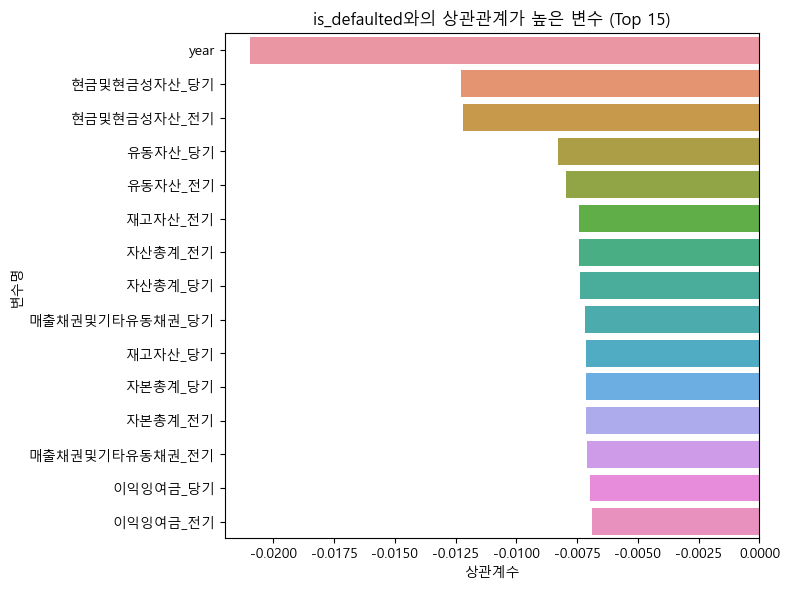

In [12]:
numeric_df = df.select_dtypes(include=[np.number])
correlations = numeric_df.corr(numeric_only=True)['is_defaulted'].sort_values(key=lambda x: abs(x), ascending=False)
correlation_df = correlations.to_frame(name='상관계수')

top_corr = correlation_df.iloc[1:16]
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr['상관계수'], y=top_corr.index)
plt.title('is_defaulted와의 상관관계가 높은 변수 (Top 15)')
plt.xlabel('상관계수')
plt.ylabel('변수명')
plt.tight_layout()
plt.show()


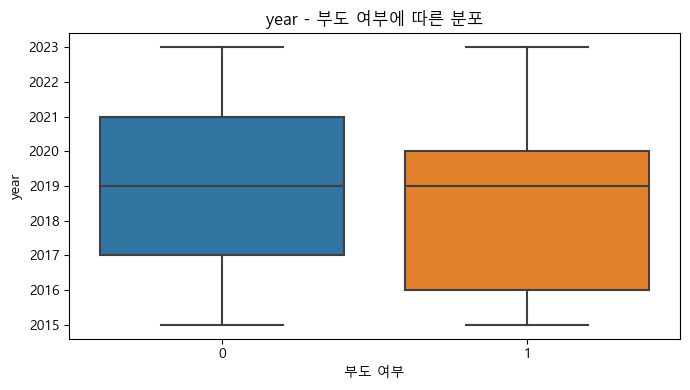

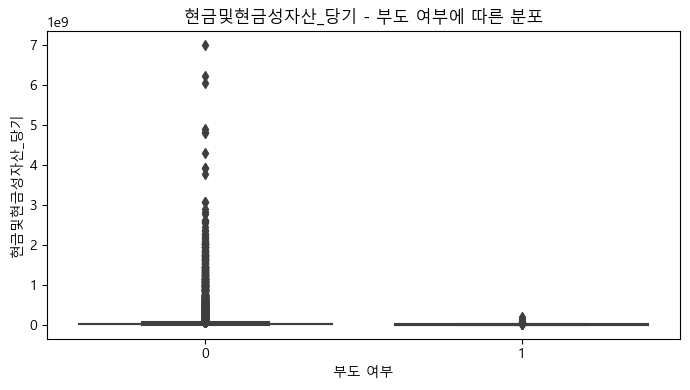

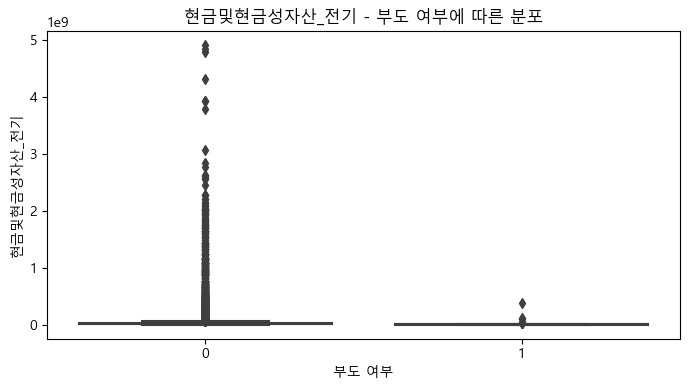

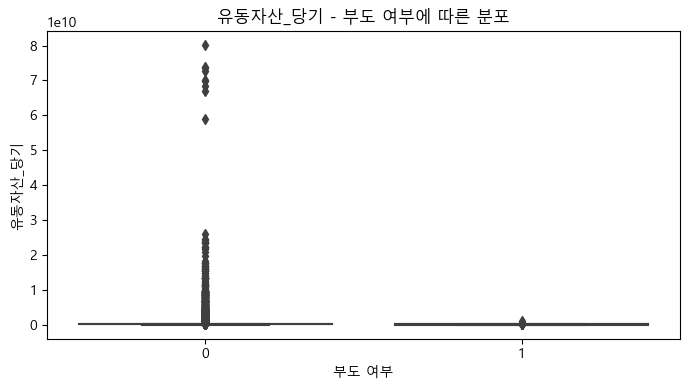

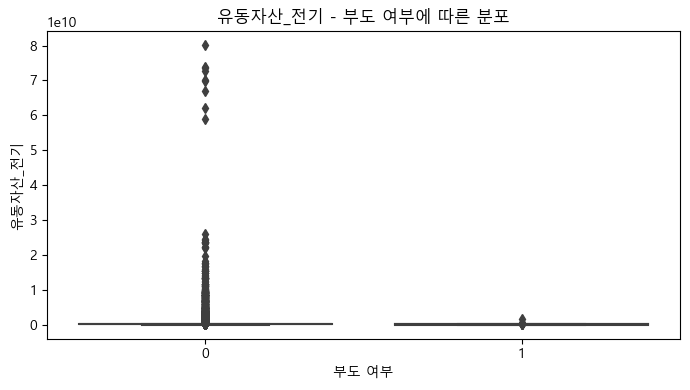

In [13]:
top_features = correlations.index[1:6].tolist()

for feature in top_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x='is_defaulted', y=feature)
    plt.title(f'{feature} - 부도 여부에 따른 분포')
    plt.xlabel('부도 여부')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()
